In [ ]:
# prompt: vemos la cantidad de nucleos

import os
os.cpu_count()


96

In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd

def cargar_datos_UR5B(file_path, fuerza=False, momento=False, prev=False, torque=False):
    """
    Carga los datos del robot UR5B desde un archivo Excel.

    Parámetros:
    - file_path: str, ruta del archivo Excel.
    - fuerza: bool, si True, agrega datos de fuerza (Fuerza_XYZ) a X.
    - momento: bool, si True, agrega datos de momento (Momento_XYZ) a X.
    - prev: bool, si True, incluye datos previos (X_prev, Y_prev).
    - torque: bool, si True y prev=True, agrega torque a Y_prev.

    Retorna:
    - Un diccionario con los conjuntos de datos requeridos.
    """
    # Cargar el archivo
    xls = pd.ExcelFile(file_path)

    # Cargar las hojas relevantes
    datos_controlador = xls.parse("Datos_Controlador")
    coord_cartesianas = xls.parse("Coord_Cartesianas")
    pos_articulares = xls.parse("Pos_Articulares")

    # Extraer Comando y Estado_Comando
    comando_estado = datos_controlador[["Comando", "Estado_Comando"]]

    # Construcción de X y Y
    X = pd.concat([comando_estado, coord_cartesianas], axis=1)
    Y = pos_articulares.copy()

    # Agregar datos opcionales
    if fuerza:
        fuerza_xyz = xls.parse("Fuerza_XYZ")
        X = pd.concat([X, fuerza_xyz], axis=1)

    if momento:
        momento_xyz = xls.parse("Momento_XYZ")
        X = pd.concat([X, momento_xyz], axis=1)

    # Manejo de datos previos
    if prev:
        X_prev = X.shift(1).iloc[1:].reset_index(drop=True)
        Y_prev = Y.shift(1).iloc[1:].reset_index(drop=True)
        X = X.iloc[1:].reset_index(drop=True)
        Y = Y.iloc[1:].reset_index(drop=True)

        if torque:
            torque_articulaciones = xls.parse("Torque_Articulaciones")
            Y_prev = pd.concat([Y_prev, torque_articulaciones.shift(1).iloc[1:].reset_index(drop=True)], axis=1)

        return {
            "X": X,
            "Y": Y,
            "X_prev": X_prev,
            "Y_prev": Y_prev
        }

    return {
        "X": X,
        "Y": Y
    }


file_path = "UR5B_Datos.xlsx"

datos_cargados = cargar_datos_UR5B(file_path, fuerza=True, momento=True, prev=True, torque=True)


In [ ]:
X_data = datos_cargados["X"]
Y_data = datos_cargados["Y"]
X_prev = datos_cargados["X_prev"]
Y_prev = datos_cargados["Y_prev"]


In [ ]:
filtro = X_data["Comando"] == 10

X_data_10 = X_data[filtro].reset_index(drop=True)
Y_data_10 = Y_data[filtro].reset_index(drop=True)
X_prev_10 = X_prev[filtro].reset_index(drop=True)
Y_prev_10 = Y_prev[filtro].reset_index(drop=True)

X_data = X_data[~filtro].reset_index(drop=True)
Y_data = Y_data[~filtro].reset_index(drop=True)
X_prev = X_prev[~filtro].reset_index(drop=True)
Y_prev = Y_prev[~filtro].reset_index(drop=True)

In [ ]:
X_data

,Comando,Estado_Comando,X,Y,Z,RX,RY,RZ,Fuerza_X,Fuerza_Y,Fuerza_Z,Momento_X,Momento_Y,Momento_Z
0,911,70,-0.003,-0.233,1.080,-0.013,-2.214,2.217,-0.141,-0.353,0.167,0.019,0.019,0.001
1,911,70,-0.003,-0.233,1.080,-0.013,-2.214,2.217,-0.141,-0.353,0.167,0.019,0.019,0.001
2,911,70,-0.003,-0.233,1.080,-0.013,-2.214,2.217,-0.005,-0.163,0.302,0.028,0.015,0.003
3,911,221,-0.003,-0.233,1.080,-0.013,-2.214,2.217,-0.005,-0.163,0.302,0.028,0.015,0.003
4,911,221,-0.003,-0.233,1.080,-0.013,-2.214,2.217,0.267,-0.192,0.139,0.018,0.020,-0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72924,914,170,-0.101,-0.133,1.079,0.003,0.002,-1.584,-4.339,-6.152,14.405,-0.331,-0.566,0.010
72925,914,170,-0.101,-0.133,1.079,0.003,0.002,-1.584,-4.339,-6.152,14.405,-0.331,-0.566,0.010
72926,914,170,-0.101,-0.133,1.079,0.003,0.002,-1.584,-4.339,-6.152,14.405,-0.331,-0.566,0.010
72927,914,170,-0.101,-0.133,1.079,0.003,0.002,-1.584,-4.538,-6.266,14.221,-0.335,-0.562,0.013


In [ ]:
X_data

,Comando,Estado_Comando,X,Y,Z,RX,RY,RZ,Fuerza_X,Fuerza_Y,Fuerza_Z,Momento_X,Momento_Y,Momento_Z
0,911,70,-0.003,-0.233,1.080,-0.013,-2.214,2.217,-0.141,-0.353,0.167,0.019,0.019,0.001
1,911,70,-0.003,-0.233,1.080,-0.013,-2.214,2.217,-0.141,-0.353,0.167,0.019,0.019,0.001
2,911,70,-0.003,-0.233,1.080,-0.013,-2.214,2.217,-0.005,-0.163,0.302,0.028,0.015,0.003
3,911,221,-0.003,-0.233,1.080,-0.013,-2.214,2.217,-0.005,-0.163,0.302,0.028,0.015,0.003
4,911,221,-0.003,-0.233,1.080,-0.013,-2.214,2.217,0.267,-0.192,0.139,0.018,0.020,-0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72924,914,170,-0.101,-0.133,1.079,0.003,0.002,-1.584,-4.339,-6.152,14.405,-0.331,-0.566,0.010
72925,914,170,-0.101,-0.133,1.079,0.003,0.002,-1.584,-4.339,-6.152,14.405,-0.331,-0.566,0.010
72926,914,170,-0.101,-0.133,1.079,0.003,0.002,-1.584,-4.339,-6.152,14.405,-0.331,-0.566,0.010
72927,914,170,-0.101,-0.133,1.079,0.003,0.002,-1.584,-4.538,-6.266,14.221,-0.335,-0.562,0.013


In [ ]:
X_prev = X_prev.add_suffix("_prev")
Y_prev = Y_prev.add_suffix("_prev")

df_concatenado = pd.concat([X_prev, Y_prev, X_data, Y_data], axis=1)

# Verificar si hay filas duplicadas
filas_duplicadas = df_concatenado.duplicated().sum()

# Eliminar filas duplicadas
df_concatenado = df_concatenado.drop_duplicates()

df_concatenado


,Comando_prev,Estado_Comando_prev,X_prev,Y_prev,Z_prev,RX_prev,RY_prev,RZ_prev,Fuerza_X_prev,Fuerza_Y_prev,...,Fuerza_Z,Momento_X,Momento_Y,Momento_Z,Q1,Q2,Q3,Q4,Q5,Q6
0,10.0,70.0,-0.003,-0.233,1.080,-0.013,-2.214,2.217,-0.141,-0.353,...,0.167,0.019,0.019,0.001,0.0,0.0,0.0,0.0,0.0,0.0
1,911.0,70.0,-0.003,-0.233,1.080,-0.013,-2.214,2.217,-0.141,-0.353,...,0.167,0.019,0.019,0.001,0.0,0.0,0.0,0.0,0.0,0.0
2,911.0,70.0,-0.003,-0.233,1.080,-0.013,-2.214,2.217,-0.141,-0.353,...,0.302,0.028,0.015,0.003,0.0,0.0,0.0,0.0,0.0,0.0
3,911.0,70.0,-0.003,-0.233,1.080,-0.013,-2.214,2.217,-0.005,-0.163,...,0.302,0.028,0.015,0.003,0.0,0.0,0.0,0.0,0.0,0.0
4,911.0,221.0,-0.003,-0.233,1.080,-0.013,-2.214,2.217,-0.005,-0.163,...,0.139,0.018,0.020,-0.002,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72923,914.0,170.0,-0.101,-0.133,1.079,0.003,0.002,-1.584,-4.433,-6.283,...,14.129,-0.329,-0.558,0.010,0.0,0.0,0.0,0.0,0.0,0.0
72924,914.0,170.0,-0.101,-0.133,1.079,0.003,0.002,-1.584,-4.433,-6.283,...,14.405,-0.331,-0.566,0.010,0.0,0.0,0.0,0.0,0.0,0.0
72925,914.0,170.0,-0.101,-0.133,1.079,0.003,0.002,-1.584,-4.339,-6.152,...,14.405,-0.331,-0.566,0.010,0.0,0.0,0.0,0.0,0.0,0.0
72927,914.0,170.0,-0.101,-0.133,1.079,0.003,0.002,-1.584,-4.339,-6.152,...,14.221,-0.335,-0.562,0.013,0.0,0.0,0.0,0.0,0.0,0.0


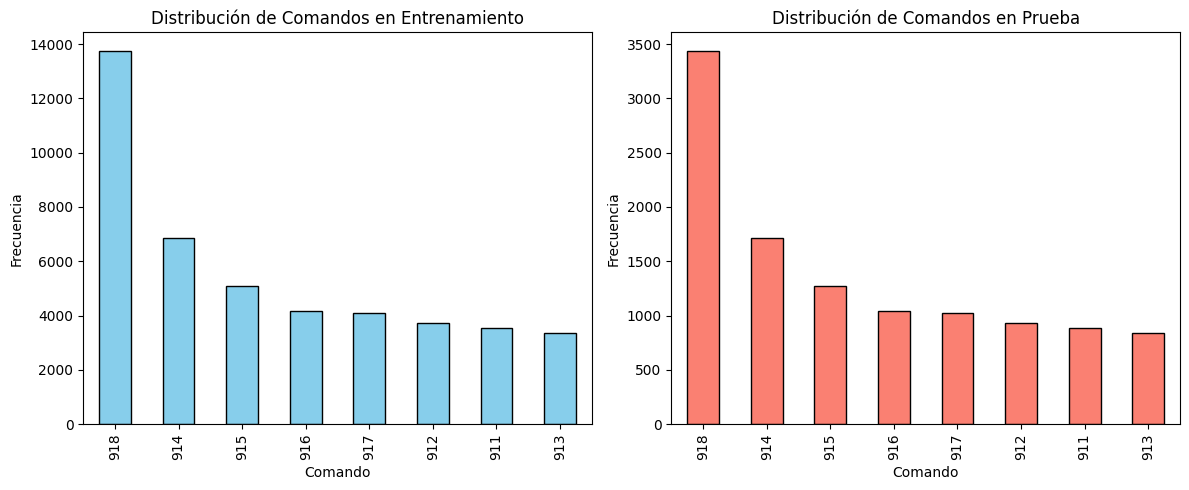

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Función para dividir en entrenamiento y prueba con visualización de la estratificación
def dividir_y_visualizar_estratificacion(df, columna_estratificar, columnas_salida, test_size=0.2, random_state=42, maxi=-1):
    """
    Divide el DataFrame en conjuntos de entrenamiento y prueba estratificados
    y genera un gráfico para visualizar la distribución de la variable de estratificación.
    Si una clase tiene más muestras que el parámetro maxi, selecciona aleatoriamente
    maxi muestras para entrenamiento y el resto va al conjunto de prueba.

    Parámetros:
    - df: DataFrame con los datos
    - columna_estratificar: str, nombre de la columna para estratificar
    - columnas_salida: list, nombres de las columnas que representan las salidas (Y)
    - test_size: float, proporción de datos para el conjunto de prueba (default 0.2)
    - random_state: int, semilla aleatoria para reproducibilidad (default 42)
    - maxi: int, número máximo de muestras por clase en entrenamiento (-1 indica sin límite)

    Retorna:
    - X_train, X_test: Conjuntos de entrenamiento y prueba sin la columna de estratificación.
    - Y_train, Y_test: Valores de las columnas de salida en los conjuntos de entrenamiento y prueba.
    """

    df = df.dropna(subset=[columna_estratificar])

    # Si maxi es -1 o no activo, usamos la división estándar
    if maxi == -1:
        # División estratificada estándar
        X_train, X_test, Y_train, Y_test = train_test_split(
            df.drop(columns=columnas_salida),  # Características sin las salidas (Y)
            df[columnas_salida],               # Variables de salida (Q actuales)
            test_size=test_size,
            random_state=random_state,
            stratify=df[columna_estratificar]
        )
    else:
        # En lugar de inicializar DataFrames vacíos, vamos a recopilar índices y hacer una sola concatenación
        indices_train_total = []
        indices_test_total = []

        # Obtener las clases únicas en la columna de estratificación
        clases_unicas = df[columna_estratificar].unique()

        # Configurar la semilla aleatoria para reproducibilidad
        np.random.seed(random_state)

        # Para cada clase, aplicar el límite máximo si es necesario
        for clase in clases_unicas:
            # Obtener las filas de esta clase
            indices_clase = df[df[columna_estratificar] == clase].index.tolist()
            n_muestras = len(indices_clase)

            # Si el número de muestras supera el máximo, limitar aleatoriamente
            if maxi > 0 and n_muestras > maxi:
                # Seleccionar aleatoriamente maxi muestras para entrenamiento
                indices_train = np.random.choice(indices_clase, size=maxi, replace=False).tolist()
                # El resto va a prueba
                indices_test = [idx for idx in indices_clase if idx not in indices_train]
            else:
                # División estratificada normal para esta clase
                indices_shuffled = np.random.permutation(indices_clase)
                n_test = int(n_muestras * test_size)
                indices_test = indices_shuffled[:n_test].tolist()
                indices_train = indices_shuffled[n_test:].tolist()

            # Agregar índices a las listas totales
            indices_train_total.extend(indices_train)
            indices_test_total.extend(indices_test)

        # Crear los DataFrames de una sola vez usando los índices recopilados
        X_train = df.loc[indices_train_total].drop(columns=columnas_salida)
        X_test = df.loc[indices_test_total].drop(columns=columnas_salida)
        Y_train = df.loc[indices_train_total, columnas_salida]
        Y_test = df.loc[indices_test_total, columnas_salida]

    # Visualización de la estratificación
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Distribución en entrenamiento
    X_train[columna_estratificar].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title("Distribución de Comandos en Entrenamiento")
    axes[0].set_xlabel(columna_estratificar)
    axes[0].set_ylabel("Frecuencia")

    # Distribución en prueba
    X_test[columna_estratificar].value_counts().plot(kind='bar', ax=axes[1], color='salmon', edgecolor='black')
    axes[1].set_title("Distribución de Comandos en Prueba")
    axes[1].set_xlabel(columna_estratificar)
    axes[1].set_ylabel("Frecuencia")

    # Mostrar gráfico
    plt.tight_layout()
    plt.show()

    return X_train, X_test, Y_train, Y_test

columnas_salida = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"]
X_train, X_test, Y_train, Y_test = dividir_y_visualizar_estratificacion(df_concatenado, "Comando", columnas_salida)


In [ ]:
columnas_dummy = ["Comando", "Estado_Comando", "Comando_prev", "Estado_Comando_prev"]
X_train_encoded = pd.get_dummies(X_train, columns=columnas_dummy)
X_test_encoded = pd.get_dummies(X_test, columns=columnas_dummy)
X_train_encoded

,X_prev,Y_prev,Z_prev,RX_prev,RY_prev,RZ_prev,Fuerza_X_prev,Fuerza_Y_prev,Fuerza_Z_prev,Momento_X_prev,...,Comando_prev_913.0,Comando_prev_914.0,Comando_prev_915.0,Comando_prev_916.0,Comando_prev_917.0,Comando_prev_918.0,Estado_Comando_prev_0.0,Estado_Comando_prev_70.0,Estado_Comando_prev_170.0,Estado_Comando_prev_221.0
49009,0.069,-0.189,0.525,-1.310,-2.839,-0.003,-5.373,-0.167,-18.038,-0.242,...,False,False,False,False,False,True,False,False,False,True
54366,-0.059,-0.158,1.074,0.191,0.216,-1.673,-5.983,-8.988,6.624,-0.299,...,False,False,False,False,False,False,False,False,False,True
70663,-0.101,-0.133,1.079,0.003,0.002,-1.584,-4.395,-6.520,13.327,-0.344,...,False,True,False,False,False,False,False,False,True,False
62906,-0.102,-0.133,1.079,0.003,-0.005,-1.582,-4.842,-5.503,10.720,-0.296,...,False,False,True,False,False,False,False,False,True,False
42888,-0.102,-0.132,1.078,0.007,-0.009,-1.577,-4.685,-5.110,5.630,-0.278,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72504,-0.101,-0.133,1.079,0.003,0.002,-1.584,-4.686,-6.197,13.818,-0.330,...,False,True,False,False,False,False,False,False,True,False
2099,-0.101,-0.133,1.079,0.004,0.003,-1.576,-6.306,-1.390,-4.538,-0.111,...,False,False,False,False,False,True,False,False,True,False
10426,0.047,-0.207,1.012,0.554,0.880,-1.788,-7.551,-0.196,-3.972,-0.040,...,False,False,False,False,False,False,False,False,False,True
5010,-0.003,-0.233,1.080,-0.013,-2.214,2.217,-0.549,-3.333,-2.240,-0.056,...,False,False,True,False,False,False,True,False,False,False


In [ ]:
if 'Comando_prev_10.0' in X_train_encoded.columns:
    X_train_encoded = X_train_encoded.drop(columns=['Comando_prev_10.0'])
    print("train")


train


## scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler

def preprocesarSL(X_train, X_test, Y_train, Y_test):
    """
    - Estandariza solo las columnas relacionadas con Fuerza, Momento y Torque si existen en los datos.
    - Mantiene las coordenadas y ángulos sin cambios.
    """
    # Identificar columnas que contienen Fuerza, Momento o Torque en el nombre
    columnas_estandarizar = [col for col in X_train.columns if any(var in col.lower() for var in ["fuerza", "fx", "fy", "fz",
                                                                                                 "momento", "mx", "my", "mz",
                                                                                                 "torque"])]

    # Inicializar scaler
    scaler = StandardScaler()

    # Aplicar estandarización solo a las columnas seleccionadas
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    if columnas_estandarizar:
        X_train_scaled[columnas_estandarizar] = scaler.fit_transform(X_train[columnas_estandarizar])
        X_test_scaled[columnas_estandarizar] = scaler.transform(X_test[columnas_estandarizar])

    return X_train_scaled, X_test_scaled, Y_train.values, Y_test.values

Xtr, Xts, Ytr, Yts = preprocesarSL(X_train_encoded, X_test_encoded, Y_train, Y_test)


In [ ]:
!pip install optuna

In [ ]:
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_parallel_coordinate

# Definir los datos (reemplaza Xtr, Ytr con tus datos reales)
X, y = Xtr, Ytr  # Asegúrate de que Xtr y Ytr están definidos

# Definir la función objetivo para la optimización
def objetivo(trial):
    """Función objetivo para la búsqueda de hiperparámetros con Optuna"""

    # Optimización de hiperparámetros principales
    alpha = trial.suggest_float("alpha", 1e-5, 1e-2, log=True)  # Corrección aquí
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])

    # Convertir las capas ocultas en una cadena para evitar el warning
    hidden_layer_sizes_options = {
        "1024-512-256": (1024, 512, 256),
        "1024-512-256-128": (1024, 512, 256, 128),
        "1024-512-256-128-64": (1024, 512, 256, 128, 64),
        "2024-1024-512-64": (2024, 1024, 512, 64),
        "2024-1024-256-32": (2024, 1024, 256, 32),
        "2024-1024-512-256-128-64": (2024, 512, 256, 128, 64)
    }

    hidden_layer_key = trial.suggest_categorical("hidden_layer_sizes", list(hidden_layer_sizes_options.keys()))
    hidden_layer_sizes = hidden_layer_sizes_options[hidden_layer_key]  # Convertimos de cadena a tupla

    # Definir el modelo
    mlp = MLPRegressor(
        alpha=alpha,
        activation=activation,
        learning_rate="adaptive",
        solver="adam",
        max_iter=600,
        hidden_layer_sizes=hidden_layer_sizes,
        random_state=42
    )

    # Evaluar modelo con validación cruzada
    score = cross_val_score(mlp, X, y, cv=2, scoring="neg_mean_squared_error", n_jobs=-1)

    return np.mean(score)

# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objetivo, n_trials=50, n_jobs=-1)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)
print("Mejor score (MSE negativo):", study.best_value)

# Guardar resultados en CSV para análisis posterior
df_results = study.trials_dataframe()
df_results.to_csv("optuna_resultados.csv", index=False)
print("Resultados guardados en optuna_resultados.csv")

from google.colab import files
files.download('optuna_resultados.csv')

# Graficar la evolución de la optimización
fig1 = plot_optimization_history(study)
fig1.show()

# Graficar la importancia de los hiperparámetros
fig2 = plot_param_importances(study)
fig2.show()

# Graficar la relación entre hiperparámetros y el score
fig3 = plot_parallel_coordinate(study)
fig3.show()


[I 2025-03-15 22:15:06,801] A new study created in memory with name: no-name-1246b8fe-ca11-41a8-a543-020c251306a4
[I 2025-03-15 22:27:36,626] Trial 28 finished with value: -0.015085860102296025 and parameters: {'alpha': 0.0012172632420902616, 'activation': 'tanh', 'hidden_layer_sizes': '1024-512-256-128-64'}. Best is trial 28 with value: -0.015085860102296025.
[I 2025-03-15 22:31:23,525] Trial 39 finished with value: -0.01120242000735669 and parameters: {'alpha': 0.00047957592283527086, 'activation': 'relu', 'hidden_layer_sizes': '1024-512-256-128'}. Best is trial 39 with value: -0.01120242000735669.
[I 2025-03-15 22:32:21,620] Trial 16 finished with value: -0.010910816476224713 and parameters: {'alpha': 0.0014223871640564538, 'activation': 'relu', 'hidden_layer_sizes': '1024-512-256-128'}. Best is trial 16 with value: -0.010910816476224713.
[I 2025-03-15 22:33:13,013] Trial 4 finished with value: -0.010275890941968093 and parameters: {'alpha': 0.0005555764395909224, 'activation': 'rel

Mejores hiperparámetros: {'alpha': 0.0033579669979774836, 'activation': 'relu', 'hidden_layer_sizes': '1024-512-256'}
Mejor score (MSE negativo): -0.007092769691826733
Resultados guardados en optuna_resultados.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from optuna.visualization import plot_slice
fig = plot_slice(study)
fig.show()




In [ ]:
from optuna.visualization import plot_contour
fig = plot_contour(study)
fig.show()


In [ ]:
from optuna.visualization import plot_edf
fig = plot_edf(study)
fig.show()


In [ ]:
from optuna.visualization import plot_timeline
fig = plot_timeline(study)
fig.show()


In [ ]:
from optuna.visualization import plot_rank
fig = plot_rank(study)
fig.show()


In [ ]:
import joblib

# Guardar estudio
joblib.dump(study, "optuna_study.pkl")

# Cargar estudio en otro script
study = joblib.load("optuna_study.pkl")



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils import validation
import seaborn as sns

# Definir los datos (reemplaza Xtr, Ytr con tus datos reales)
X, y = Xtr, Ytr  # Asegúrate de que Xtr y Ytr están definidos

# Definir los hiperparámetros a optimizar
param_grid = {
    "hidden_layer_sizes": [
        (128, 64, 32), (256, 128, 64), (512, 256, 128),
        (128, 64, 32, 16), (256, 128, 64, 32, 16),
        (1024, 512, 256), (1024, 512, 256, 128, 64)
    ],
    "alpha": [1e-5, 1e-4, 1e-3, 1e-2],
    "activation": ["relu", "tanh", "logistic"],
    "learning_rate": ["constant", "adaptive"],
    "solver": ["lbfgs", "adam"],  # SGD se omite porque es más lento
    "max_iter": [500, 1000, 1500, 2000]
}

# Definir el modelo base
mlp = MLPRegressor(random_state=42)

# Configurar Halving Grid Search con búsqueda reducida sucesiva
halving_gs = HalvingGridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    factor=2,  # Duplica los recursos en cada iteración
    min_resources="exhaust",  # Comienza con el mínimo de recursos disponibles
    cv=2,  # Validación cruzada mínima para acelerar
    scoring="neg_mean_squared_error",
    n_jobs=-1,  # Usa todos los núcleos disponibles
    verbose=3,  # Muestra el progreso
    refit=True  # Reentrena el mejor modelo encontrado
)

# Ejecutar la búsqueda de hiperparámetros
halving_gs.fit(X, y)

# Obtener los mejores hiperparámetros
best_params = halving_gs.best_params_
best_score = halving_gs.best_score_

print(f"Mejores hiperparámetros: {best_params}")
print(f"Mejor score (MSE negativo): {best_score:.6f}")

# Guardar los resultados en CSV
df_results = pd.DataFrame(halving_gs.cv_results_)
df_results.to_csv("halving_results.csv", index=False)
print("Resultados guardados en halving_results.csv")

# Graficar la evolución de los hiperparámetros
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_results["iter"], y=-df_results["mean_test_score"], marker="o")
plt.xlabel("Iteraciones")
plt.ylabel("MSE (negativo)")
plt.title("Evolución de la optimización con HalvingGridSearchCV")
plt.grid(True)
plt.show()

# Graficar la importancia de cada hiperparámetro en el score
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_results, x="param_hidden_layer_sizes", y=-df_results["mean_test_score"])
plt.xticks(rotation=45)
plt.xlabel("Tamaño de Capas Ocultas")
plt.ylabel("MSE (negativo)")
plt.title("Impacto de hidden_layer_sizes en el rendimiento")
plt.grid(True)
plt.show()


n_iterations: 11
n_required_iterations: 11
n_possible_iterations: 11
min_resources_: 26
max_resources_: 27639
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1344
n_resources: 26
Fitting 2 folds for each of 1344 candidates, totalling 2688 fits


KeyboardInterrupt: 

Top 12 configuraciones encontradas:
   alpha activation       hidden_layer_sizes     score  trial
0.003358       relu             1024-512-256 -0.007093     11
0.005666       relu 2024-1024-512-256-128-64 -0.007366     33
0.000044       relu         1024-512-256-128 -0.007844     34
0.003083       relu 2024-1024-512-256-128-64 -0.007859     37
0.000060       relu             1024-512-256 -0.007927     13
0.000310       relu         2024-1024-256-32 -0.008374      3
0.000056       relu      1024-512-256-128-64 -0.008418      1
0.002713       relu         2024-1024-512-64 -0.008671     42
0.007026       relu      1024-512-256-128-64 -0.008693     19
0.002417       relu         2024-1024-256-32 -0.008788     12
0.000036       relu         2024-1024-512-64 -0.008932     32
0.001086       relu 2024-1024-512-256-128-64 -0.009068     14


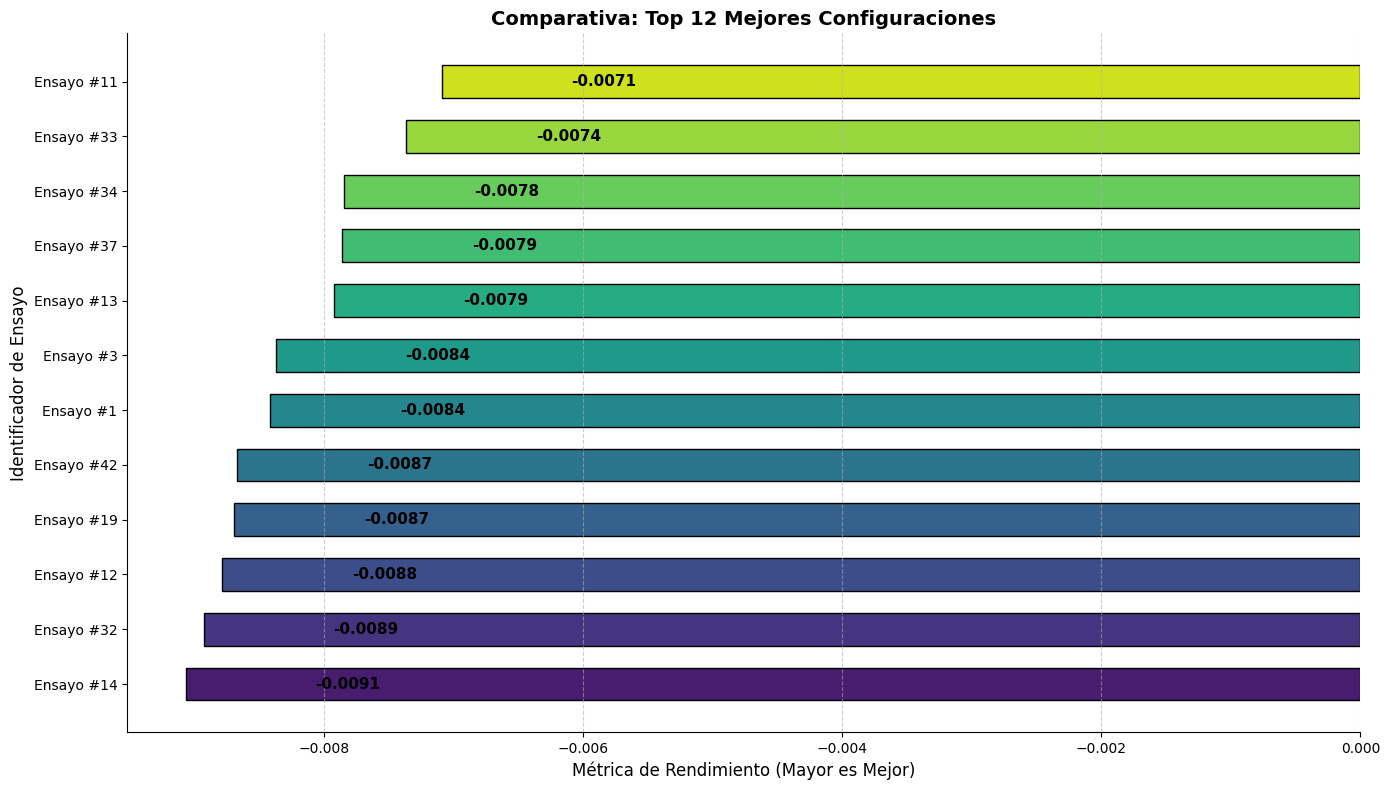

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. OBTENCIÓN Y PREPARACIÓN DE DATOS
# Obtener los 12 mejores ensayos (ordenados por métrica objetivo)
best_trials = sorted(study.trials, key=lambda t: t.value, reverse=True)[:12]

# Crear DataFrame con los mejores ensayos
df_best = pd.DataFrame([
    {**trial.params, "score": trial.value, "trial": trial.number}
    for trial in best_trials
])

# 2. IMPRESIÓN DE DATOS EN CONSOLA
print("Top 12 configuraciones encontradas:")
print(df_best.sort_values(by="score", ascending=False).to_string(index=False))

# 3. VISUALIZACIÓN GRÁFICA (CORREGIDA)
def generar_grafico_optuna(df_best, guardar_archivo=True):
    """
    Genera un gráfico de barras horizontales con los mejores ensayos de Optuna.

    Args:
        df_best (DataFrame): DataFrame con los mejores ensayos
        guardar_archivo (bool): Indica si se debe guardar el gráfico como archivo
    """
    # Ordenar por score (de mejor a peor)
    df_grafico = df_best.sort_values(by="score", ascending=False).reset_index(drop=True)

    # Crear etiquetas para el eje Y
    labels = [f"Ensayo #{t}" for t in df_grafico['trial']]

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(14, 8))

    # Crear el gráfico de barras directamente con matplotlib
    # Esto evita el error con seaborn
    bars = ax.barh(range(len(df_grafico)), df_grafico['score'],
                  color=sns.color_palette("viridis_r", n_colors=len(df_grafico)),
                  edgecolor='black', height=0.6)

    # Configurar etiquetas del eje Y
    ax.set_yticks(range(len(df_grafico)))
    ax.set_yticklabels(labels)

    # Añadir etiquetas con los valores numéricos precisos
    for i, bar in enumerate(bars):
        score = df_grafico.iloc[i]['score']
        ax.text(score + 0.001, i, f"{score:.4f}",
                va="center", fontsize=11, fontweight='bold')

    # Configurar títulos y etiquetas de ejes
    ax.set_title('Comparativa: Top 12 Mejores Configuraciones', fontsize=14, fontweight='bold')
    ax.set_xlabel('Métrica de Rendimiento (Mayor es Mejor)', fontsize=12)
    ax.set_ylabel('Identificador de Ensayo', fontsize=12)

    # Añadir líneas de cuadrícula para facilitar la lectura
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    # Eliminar bordes superiores y derechos
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Invertir el eje Y para que el mejor ensayo esté arriba
    ax.invert_yaxis()

    # Ajustar diseño para evitar solapamientos
    plt.tight_layout()

    # Guardar el gráfico si se solicita
    if guardar_archivo:
        plt.savefig('mejores_ensayos_optuna.png', dpi=300, bbox_inches='tight')

    # Mostrar el gráfico
    plt.show()

# Ejecutar la función de generación del gráfico
generar_grafico_optuna(df_best)


In [ ]:
import joblib

mejor_param = study.best_trial.params
if "hidden_layer_sizes" in mejor_param:
    mejor_param["hidden_layer_sizes"] = tuple(map(int, mejor_param["hidden_layer_sizes"].split('-')))

mejor_modelo = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(1024, 512, 256),
    alpha = 0.003358,
    learning_rate="adaptive",
    solver="adam",
    max_iter=2000,
    random_state=42,

)

mejor_modelo.fit(X, y)

joblib.dump(mejor_modelo, "mejor_modelo_optuna.pkl")
print("Modelo guardado como 'mejor_modelo_optuna.pkl'")



Modelo guardado como 'mejor_modelo_optuna.pkl'


In [ ]:
Xtr

,X_prev,Y_prev,Z_prev,RX_prev,RY_prev,RZ_prev,Fuerza_X_prev,Fuerza_Y_prev,Fuerza_Z_prev,Momento_X_prev,...,Comando_prev_913.0,Comando_prev_914.0,Comando_prev_915.0,Comando_prev_916.0,Comando_prev_917.0,Comando_prev_918.0,Estado_Comando_prev_0.0,Estado_Comando_prev_70.0,Estado_Comando_prev_170.0,Estado_Comando_prev_221.0
49009,0.069,-0.189,0.525,-1.310,-2.839,-0.003,-0.561838,0.774015,-1.241818,-0.459903,...,False,False,False,False,False,True,False,False,False,True
54366,-0.059,-0.158,1.074,0.191,0.216,-1.673,-0.682527,-1.119995,1.223103,-0.730230,...,False,False,False,False,False,False,False,False,False,True
70663,-0.101,-0.133,1.079,0.003,0.002,-1.584,-0.368340,-0.590076,1.893056,-0.943645,...,False,True,False,False,False,False,False,False,True,False
62906,-0.102,-0.133,1.079,0.003,-0.005,-1.582,-0.456779,-0.371710,1.632491,-0.716002,...,False,False,True,False,False,False,False,False,True,False
42888,-0.102,-0.132,1.078,0.007,-0.009,-1.577,-0.425716,-0.287326,1.123755,-0.630636,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72504,-0.101,-0.133,1.079,0.003,0.002,-1.584,-0.425914,-0.520722,1.942130,-0.877249,...,False,True,False,False,False,False,False,False,True,False
2099,-0.101,-0.133,1.079,0.004,0.003,-1.576,-0.746433,0.511417,0.107482,0.161374,...,False,False,False,False,False,True,False,False,True,False
10426,0.047,-0.207,1.012,0.554,0.880,-1.788,-0.992758,0.767788,0.164053,0.498096,...,False,False,False,False,False,False,False,False,False,True
5010,-0.003,-0.233,1.080,-0.013,-2.214,2.217,0.392596,0.094224,0.337163,0.422215,...,False,False,True,False,False,False,True,False,False,False


In [ ]:
# prompt: ver cuales columnas difieren en Xts y Xtr

# Find differing columns between Xtr and Xts
diff_cols = set(Xtr.columns) ^ set(Xts.columns)

print("Columnas diferentes entre Xtr y Xts:")
print(diff_cols)

# Optionally, print the columns present in each DataFrame
print("\nColumnas en Xtr:")
print(Xtr.columns.tolist())

print("\nColumnas en Xts:")
print(Xts.columns.tolist())


Columnas diferentes entre Xtr y Xts:
{'Estado_Comando_70', 'Estado_Comando_prev_70.0'}

Columnas en Xtr:
['X_prev', 'Y_prev', 'Z_prev', 'RX_prev', 'RY_prev', 'RZ_prev', 'Fuerza_X_prev', 'Fuerza_Y_prev', 'Fuerza_Z_prev', 'Momento_X_prev', 'Momento_Y_prev', 'Momento_Z_prev', 'Q1_prev', 'Q2_prev', 'Q3_prev', 'Q4_prev', 'Q5_prev', 'Q6_prev', 'Torque_Q1_prev', 'Torque_Q2_prev', 'Torque_Q3_prev', 'Torque_Q4_prev', 'Torque_Q5_prev', 'Torque_Q6_prev', 'X', 'Y', 'Z', 'RX', 'RY', 'RZ', 'Fuerza_X', 'Fuerza_Y', 'Fuerza_Z', 'Momento_X', 'Momento_Y', 'Momento_Z', 'Comando_911', 'Comando_912', 'Comando_913', 'Comando_914', 'Comando_915', 'Comando_916', 'Comando_917', 'Comando_918', 'Estado_Comando_0', 'Estado_Comando_70', 'Estado_Comando_170', 'Estado_Comando_221', 'Comando_prev_911.0', 'Comando_prev_912.0', 'Comando_prev_913.0', 'Comando_prev_914.0', 'Comando_prev_915.0', 'Comando_prev_916.0', 'Comando_prev_917.0', 'Comando_prev_918.0', 'Estado_Comando_prev_0.0', 'Estado_Comando_prev_70.0', 'Estado_

In [ ]:
, , Ytr, Yts

In [ ]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

mejor_modelo = joblib.load("mejor_modelo_optuna.pkl")

# Hacer predicciones en el conjunto de prueba
Y_pred = mejor_modelo.predict(Xts)

# Calcular RMSE general
rmse_general = np.sqrt(mean_squared_error(Yts, Y_pred))

# Calcular RMSE por cada salida Q1, ..., Q6
rmse_por_q = np.sqrt(np.mean((Yts - Y_pred) ** 2, axis=0))

# Crear gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(["General"] + ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"], [rmse_general] + list(rmse_por_q), color="skyblue", edgecolor="black")

# Etiquetas y título
plt.xlabel("Variables de salida")
plt.ylabel("RMSE")
plt.title("RMSE General y por Variable de Salida")
plt.grid(axis="y")

# Mostrar la gráfica
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Fuerza_X
- Fuerza_X_prev
- Fuerza_Y
- Fuerza_Y_prev
- Fuerza_Z
- ...
Feature names seen at fit time, yet now missing:
- Estado_Comando_70
- Estado_Comando_prev_70.0


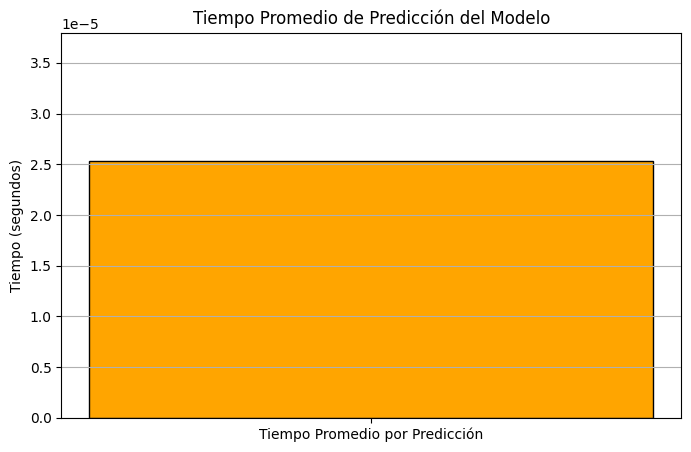

Tiempo total de predicción: 0.174940 segundos
Tiempo promedio por predicción: 2.531698e-05 segundos


In [ ]:
import time

# Medir el tiempo de predicción en Xts
num_predicciones = Xts.shape[0]
inicio = time.time()
Y_pred = mejor_modelo.predict(Xts)
fin = time.time()

# Calcular tiempo promedio por predicción
tiempo_total = fin - inicio
tiempo_promedio = tiempo_total / num_predicciones

# Crear gráfica del tiempo de predicción
plt.figure(figsize=(8, 5))
plt.bar(["Tiempo Promedio por Predicción"], [tiempo_promedio], color="orange", edgecolor="black")

# Etiquetas y título
plt.ylabel("Tiempo (segundos)")
plt.title("Tiempo Promedio de Predicción del Modelo")
plt.ylim(0, tiempo_promedio * 1.5)  # Ajustar escala para mejor visualización
plt.grid(axis="y")

# Mostrar la gráfica
plt.show()

print(f"Tiempo total de predicción: {tiempo_total:.6f} segundos")
print(f"Tiempo promedio por predicción: {tiempo_promedio:.6e} segundos")

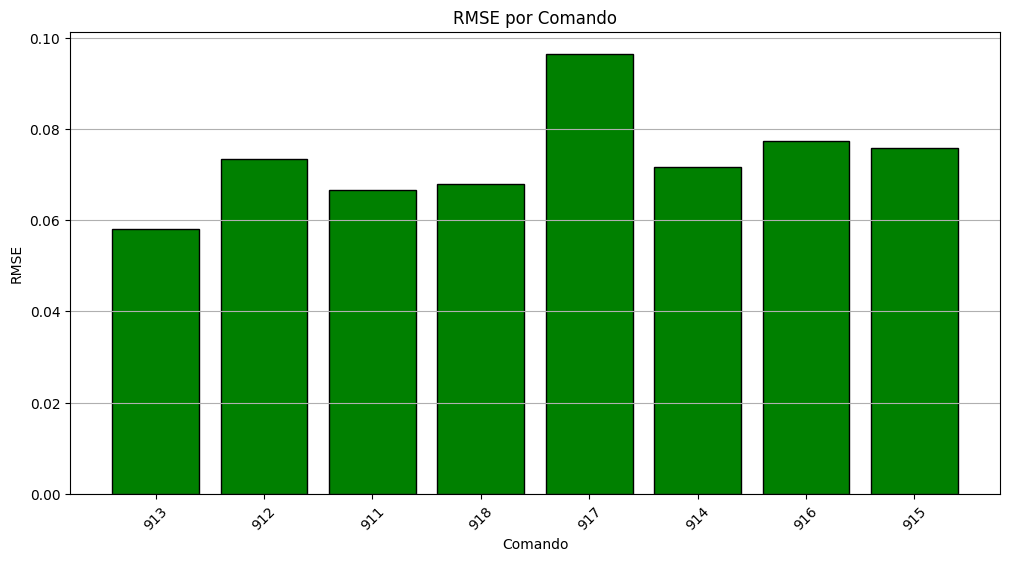

In [ ]:
# Identificar las columnas dummy relacionadas con "Comando"
columnas_comando = [col for col in Xts.columns if col.startswith("Comando_")]

# Reconstruir los comandos originales
comandos_predichos = Xts[columnas_comando].idxmax(axis=1).str.replace("Comando_", "")

# Obtener los comandos únicos en el conjunto de prueba
comandos_unicos = comandos_predichos.unique()

# Calcular RMSE por cada comando
rmse_por_comando = []
for comando in comandos_unicos:
    indices = comandos_predichos == comando
    rmse_comando = np.sqrt(mean_squared_error(Yts[indices], Y_pred[indices]))
    rmse_por_comando.append(rmse_comando)

# Crear gráfica de barras para RMSE por comando
plt.figure(figsize=(12, 6))
plt.bar(comandos_unicos, rmse_por_comando, color="green", edgecolor="black")

# Etiquetas y título
plt.xlabel("Comando")
plt.ylabel("RMSE")
plt.title("RMSE por Comando")
plt.xticks(rotation=45)
plt.grid(axis="y")

# Mostrar la gráfica
plt.show()
